### This notebook is aimed to analyze cifar10 weights to apply quantization to maintain the accuracy

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utils.weights import get_weights

In [2]:
weights_dict = get_weights()

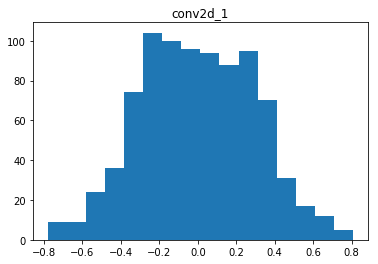

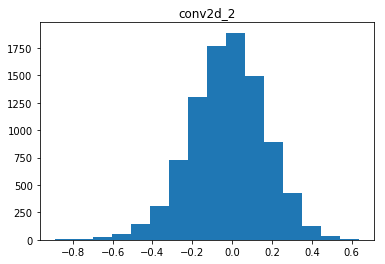

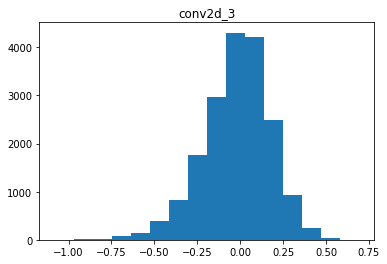

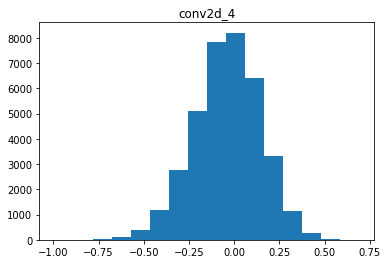

In [3]:
# plot the weight distribution of convolutional layers
for i in range(4):
    conv_name = 'conv2d_%d' % (i + 1)
    weights = weights_dict[conv_name]['kernel'].flatten()
    plt.figure()
    plt.hist(weights, bins=16)
    plt.title(conv_name)
plt.show()

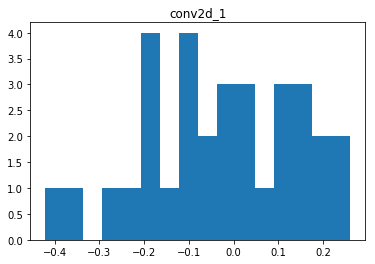

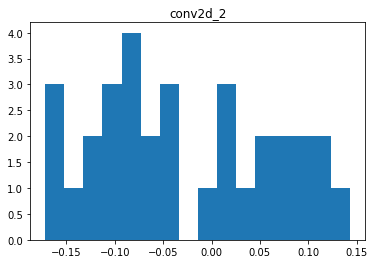

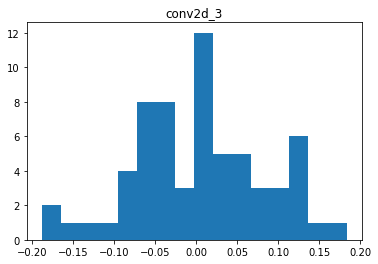

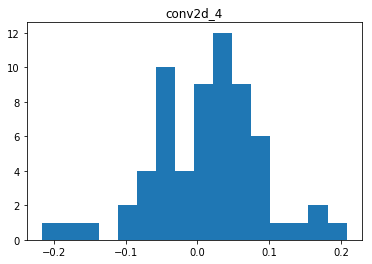

In [4]:
# plot the bias distribution of convolutional layers
for i in range(4):
    conv_name = 'conv2d_%d' % (i + 1)
    weights = weights_dict[conv_name]['bias'].flatten()
    plt.figure()
    plt.hist(weights, bins=16)
    plt.title(conv_name)
plt.show()

max: 0.715698 min: -0.920182


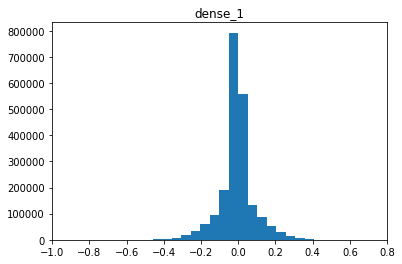

max: 0.305011 min: -1.17952


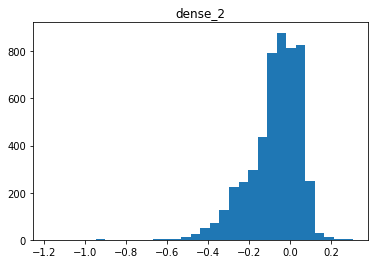

In [13]:
# plot the weight distribution of dense layers
for i in range(2):
    conv_name = 'dense_%d' % (i + 1)
    weights = weights_dict[conv_name]['kernel'].flatten()
    print 'max:', max(weights), 'min:', min(weights)
    plt.figure()
    plt.hist(weights, bins=32)
    plt.title(conv_name)
    plt.show()

In [12]:
import h5py
import os
# load data of output of each layer of 10000 testing samples from cifar10
data_each_layer = h5py.File('data/cifar-10_output.h5')
layers = data_each_layer['x_test_group'].keys()
print(layers)

[u'activation_1', u'activation_2', u'activation_3', u'activation_4', u'activation_5', u'batch_normalization_1', u'batch_normalization_2', u'batch_normalization_3', u'batch_normalization_4', u'conv2d_1', u'conv2d_1_input', u'conv2d_2', u'conv2d_3', u'conv2d_4', u'dense_1', u'dense_2', u'dropout_1', u'flatten_1', u'max_pooling2d_1', u'max_pooling2d_2']


max: 0.607863 min: -0.550074


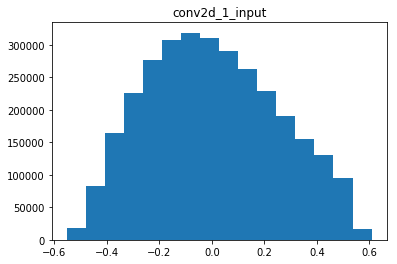

max: 1.97252 min: -2.06068


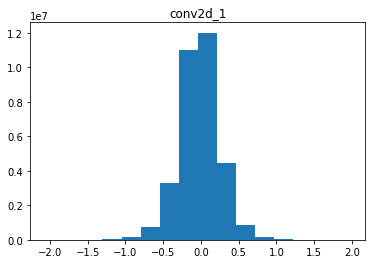

max: 16.4691 min: -14.6701


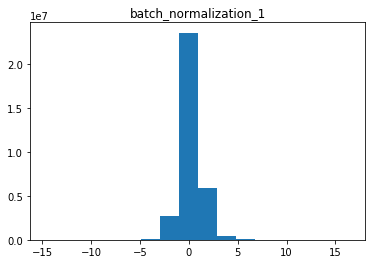

max: 49.2043 min: -59.5798


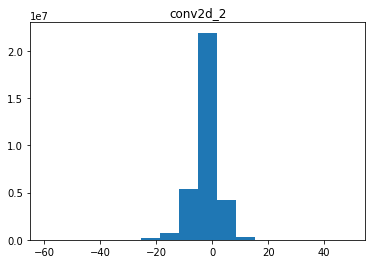

max: 12.3461 min: -15.7176


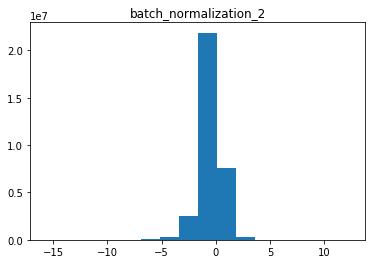

max: 27.8676 min: -55.7986


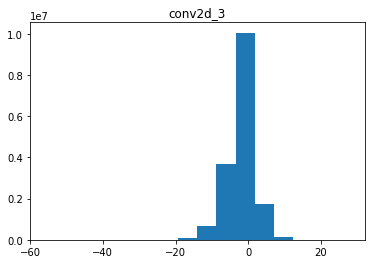

max: 9.44782 min: -15.3916


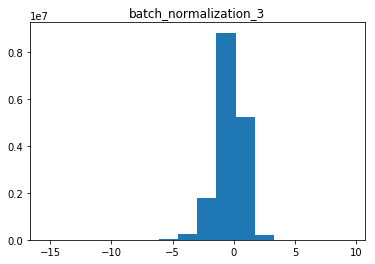

max: 18.1082 min: -53.1036


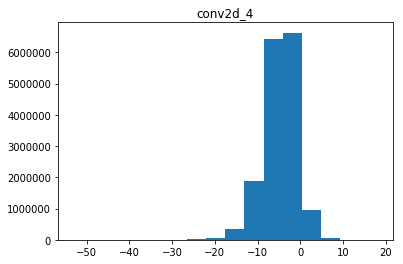

max: 3.23568 min: -7.8203


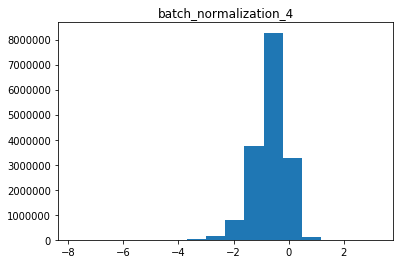

max: 19.1912 min: -20.1002


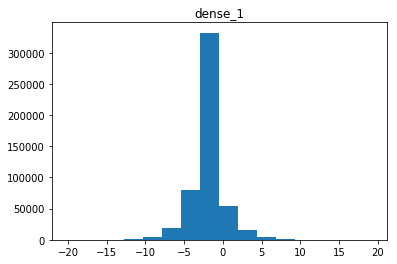

max: 26.4767 min: -68.9469


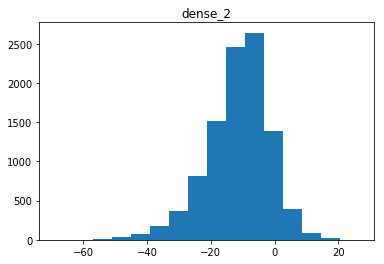

In [20]:
useful_layers = ['conv2d_1_input', 'conv2d_1', u'batch_normalization_1', u'conv2d_2', u'batch_normalization_2', 
                 u'conv2d_3', u'batch_normalization_3', u'conv2d_4', u'batch_normalization_4', u'dense_1', u'dense_2']
# plot the output of each layer
for layer in useful_layers:
    data = data_each_layer['x_test_group'][layer][0:1000].flatten()
    print 'max:', max(data), 'min:', min(data)
    plt.figure()
    plt.hist(data, bins=16)
    plt.title(layer)
    plt.show()